In [2]:
import pandas as pd
import re
import numpy as np
import heapq
import nltk
from nltk.corpus import stopwords
#from naive_bayes import naive_bayes_train, naive_bayes_predict
#from decision_tree import calculate_information_gain, decision_tree_train, decision_tree_predict
#from logistic_regression import sigmoid, logistic_regression_fit, logistic_regression_predict


# First Time Running

1. install nltk and download stopwords

In [4]:
%pip install nltk

In [6]:
%pwd

'/content'

In [7]:
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!pwd
raw_train_df=pd.read_csv("/content/drive/MyDrive/data/train.csv") 
raw_test_df=pd.read_csv("/content/drive/MyDrive/data/test.csv") 
raw_train_df.head()


/content


,title,text,subject,date,label
0,Clinton faces pressure to pick VP who is tough...,WASHINGTON (Reuters) - Members of the Democrat...,politicsNews,"July 21, 2016",real
1,"Ryan, Trump cite 'positive step' toward Republ...",WASHINGTON (Reuters) - Presumptive Republican ...,politicsNews,"May 12, 2016",real
2,WATCH: President Obama Dares Republicans To S...,Conservatives talk the talk but can they walk ...,News,"July 9, 2016",fake
3,Hariri warns Lebanon faces Arab sanctions risk...,BEIRUT (Reuters) - Saad al-Hariri warned on Su...,worldnews,"November 12, 2017",real
4,A POEM: ‘Twas The Night Before CNN’s Christmas…’,ACR s BOILER ROOM presents a Christmas poem Tw...,Middle-east,"December 25, 2017",fake


In [10]:
raw_train_df['text']

0        WASHINGTON (Reuters) - Members of the Democrat...
1        WASHINGTON (Reuters) - Presumptive Republican ...
2        Conservatives talk the talk but can they walk ...
3        BEIRUT (Reuters) - Saad al-Hariri warned on Su...
4        ACR s BOILER ROOM presents a Christmas poem Tw...
                               ...                        
39893    The truth hurts  The idea that there are peopl...
39894    Donald Trump recently gave a speech to the Ame...
39895    BELGRADE (Reuters) - Serbian gay right activis...
39896    Tune in to the Alternate Current Radio Network...
39897    WASHINGTON (Reuters) - President Donald Trump ...
Name: text, Length: 39898, dtype: object

In [11]:
def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    return text

In [12]:
x_train = []
for t in list(raw_train_df['text']):
    x_train.append(clean_text(t))
    
x_test= []
for t in list(raw_test_df['text']):
    x_test.append(clean_text(t))

In [ ]:
#for unit testing
x_unit = []
x_unit.append(clean_text(x_train[1]))
x_unit.append(clean_text(x_train[2]))
x_unit.append(clean_text(x_train[3]))
x_unit

['washington  reuters    presumptive republican presidential nominee donald trump and house of representatives speaker paul ryan said on thursday they had taken positive step  toward unifying the republican party with the goal of winning the white house in november   with that focus  we had great conversation this morning  while we were honest about our few differences  we recognize that there are also many important areas of common ground   the two said in joint statement    this was our first meeting  but it was very positive step toward unification   the statement said  ',
 'conservatives talk the talk but can they walk the walk that exactly what president obama dared them to do during press conference in warsaw  poland on saturday when he asked them to prove they truly care about the lives of police officers by supporting common sense gun measures to make the jobs of cops easier and safer republicans have repeatedly blamed president obama and black lives matter for the killing of f

In [13]:
def extract_text(s):    
    stop_words = set(stopwords.words('english'))  #pending more stop words    
    words = re.sub("[^\w]", " ",  s).split()    
    extracted = [w.lower() for w in words if w not in stop_words]    
    return extracted

In [14]:
def init_bag_dict(x):
    bag = {}
    x = list(set(x))
    for entry in x:
        new_words = extract_text(entry)
        for word in new_words:
            if word not in bag.keys():
                bag[word] = 1
            else:
                bag[word] += 1
    return bag

In [15]:
def tokenize(x, bag, d=300):
    most_freq = heapq.nlargest(d, bag, key=bag.get)
    vectorized_x = []
    for entry in x:
        curr_bag = np.zeros(len(most_freq))
        extracted_text = extract_text(entry)
        for i, token in enumerate(most_freq):
            curr_bag[i] = extracted_text.count(token)
        vectorized_x.append(curr_bag)
    vectorized_x = np.asarray(vectorized_x)
    return vectorized_x, most_freq

In [ ]:
# def init_BOW(x):
#     bag = []
#     x = list(set(x))
#     for entry in x:
#         new_words = extract_text(entry)
#         bag.extend(new_words)
#     return bag

In [ ]:
# def BOW_tokenize(x):
#     vectorized_x = []
#     bag = init_BOW(x)
#     for entry in x:
#         extracted_text = extract_text(entry)
#         curr_bag = np.zeros(len(bag))
#         for w in extracted_text:
#             for i, word_in_bag in enumerate(bag): 
#                 if(w==word_in_bag):
#                     curr_bag[i] += 1
#         vectorized_x.append(curr_bag)
#     return vectorized_x

In [16]:
bag = init_bag_dict(x_train)

In [17]:
#optimal feature number 8
num_of_feature = 8
x_train_vec, most_freq = tokenize(x_train, bag, d=num_of_feature) 
x_test_vec, most_freq = tokenize(x_test, bag, d=num_of_feature)
x_test_vec_binary = x_test_vec>0
x_train_vec_binary = x_train_vec>0

In [18]:
most_freq

['said', 'trump', 'would', 'president', 'people', 'one', 'state', 'reuters']

In [ ]:
x_test_vec

array([[ 0.,  4.,  4., ...,  0.,  0.,  1.],
       [ 1.,  4.,  0., ...,  0.,  0.,  0.],
       [ 4.,  4.,  1., ...,  0.,  0.,  2.],
       ...,
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0., 11.,  0., ...,  1.,  0.,  0.],
       [ 5., 13.,  2., ...,  1.,  1.,  0.]])

In [ ]:
x_train_vec_binary.shape

(39898, 8)

In [ ]:
y_train = raw_train_df['label']
y_train = np.array(list(map(lambda x: 1 if x=="real" else 0, y_train)))
y_test = raw_test_df['label']
y_test = np.array(list(map(lambda x: 1 if x=="real" else 0, y_test)))

In [ ]:
y_train

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
nb_params = {}
nb_model = naive_bayes_train(x_train_vec_binary.T, y_train, nb_params)

nb_train_predictions = naive_bayes_predict(x_train_vec_binary.T, nb_model)
nb_train_accuracy = np.mean(nb_train_predictions == y_train)
print("Naive Bayes training accuracy: %f" % nb_train_accuracy)

nb_test_predictions = naive_bayes_predict(x_test_vec_binary.T, nb_model)
nb_test_accuracy = np.mean(nb_test_predictions == y_test)
print("Naive Bayes testing accuracy: %f" % nb_test_accuracy)


Naive Bayes training accuracy: 0.991929
Naive Bayes testing accuracy: 0.994800


In [ ]:
accuracy = accuracy_score(y_test, nb_test_predictions)
precision = precision_score(y_test, nb_test_predictions)
recall = recall_score(y_test, nb_test_predictions)
f1score = f1_score(y_test, nb_test_predictions)

print('accuracy: %f' % accuracy)
print('precision: %f' % precision)
print('recall: %f' % recall)
print('f1score: %f' % f1score)

In [ ]:

dt_params = { 'max_depth': 16 }
dt_model = decision_tree_train(x_train_vec_binary.T, y_train, dt_params)

dt_train_predictions = decision_tree_predict(x_train_vec_binary.T, dt_model)                     
dt_train_accuracy = np.mean(dt_train_predictions == y_train)
print("Decision tree training accuracy: %f" % dt_train_accuracy)

dt_test_predictions = decision_tree_predict(x_test_vec_binary.T, dt_model)                     
dt_test_accuracy = np.mean(dt_test_predictions == y_test)
print("Decision tree testing accuracy: %f" % dt_test_accuracy)


Decision tree training accuracy: 0.992456
Decision tree testing accuracy: 0.993800


In [ ]:
accuracy = accuracy_score(y_test, dt_test_predictions)
precision = precision_score(y_test, dt_test_predictions)
recall = recall_score(y_test, dt_test_predictions)
f1score = f1_score(y_test, dt_test_predictions)

print('accuracy: %f' % accuracy)
print('precision: %f' % precision)
print('recall: %f' % recall)
print('f1score: %f' % f1score)

In [ ]:
regressor_weights, regressor_bias = logistic_regression_fit(x_train_vec_binary, y_train, learning_rate=0.001, n_iters=2000)
regressor_train_predictions = logistic_regression_predict(x_train_vec_binary, regressor_weights, regressor_bias)
regressor_test_predictions = logistic_regression_predict(x_test_vec_binary, regressor_weights, regressor_bias)

lr_train_accuracy = np.mean(regressor_train_predictions == y_train)
lr_test_accuracy = np.mean(regressor_test_predictions == y_test)
print("Logistic Regression training accuracy: %f" % lr_train_accuracy)
print("Logistic Regression testing accuracy: %f" % lr_test_accuracy)

Logistic Regression training accuracy: 0.954810
Logistic Regression testing accuracy: 0.987000


In [ ]:
accuracy = accuracy_score(y_test, regressor_test_predictions)
precision = precision_score(y_test, regressor_test_predictions)
recall = recall_score(y_test, regressor_test_predictions)
f1score = f1_score(y_test, regressor_test_predictions)

print('accuracy: %f' % accuracy)
print('precision: %f' % precision)
print('recall: %f' % recall)
print('f1score: %f' % f1score)

# Accuracy & Performance


## Overall Accuarcy



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
features = []
nb_test_accuracy_list = []
nb_train_accuracy_list = []
dt_train_accuracy_list = []
dt_test_accuracy_list = []
lr_train_accuracy_list = []
lr_test_accuracy_list = []

for i in range(2, 13):
  print("------------------------")
  x_train_vec, most_freq = tokenize(x_train, bag, d=i)
  x_test_vec, most_freq = tokenize(x_test, bag, d=i)
  x_test_vec_binary = x_test_vec>0
  x_train_vec_binary = x_train_vec>0

  nb_params = {}
  nb_model = naive_bayes_train(x_train_vec_binary.T, y_train, nb_params)

  nb_train_predictions = naive_bayes_predict(x_train_vec_binary.T, nb_model)
  nb_train_accuracy = np.mean(nb_train_predictions == y_train)
  print("Naive Bayes training accuracy: %f" % nb_train_accuracy)

  nb_test_predictions = naive_bayes_predict(x_test_vec_binary.T, nb_model)
  nb_test_accuracy = np.mean(nb_test_predictions == y_test)
  print("Naive Bayes testing accuracy: %f" % nb_test_accuracy)

  dt_params = { 'max_depth': 16 }
  dt_model = decision_tree_train(x_train_vec_binary.T, y_train, dt_params)

  dt_train_predictions = decision_tree_predict(x_train_vec_binary.T, dt_model)                     
  dt_train_accuracy = np.mean(dt_train_predictions == y_train)
  print("Decision tree training accuracy: %f" % dt_train_accuracy)

  dt_test_predictions = decision_tree_predict(x_test_vec_binary.T, dt_model)                     
  dt_test_accuracy = np.mean(dt_test_predictions == y_test)
  print("Decision tree testing accuracy: %f" % dt_test_accuracy)

  regressor_weights, regressor_bias = logistic_regression_fit(x_train_vec_binary, y_train, learning_rate=0.001, n_iters=2000)
  regressor_train_predictions = logistic_regression_predict(x_train_vec_binary, regressor_weights, regressor_bias)
  regressor_test_predictions = logistic_regression_predict(x_test_vec_binary, regressor_weights, regressor_bias)

  lr_train_accuracy = np.mean(regressor_train_predictions == y_train)
  lr_test_accuracy = np.mean(regressor_test_predictions == y_test)
  print("Logistic Regression training accuracy: %f" % lr_train_accuracy)
  print("Logistic Regression testing accuracy: %f" % lr_test_accuracy)

  features.append(i)
  nb_test_accuracy_list.append(nb_test_accuracy)
  nb_train_accuracy_list.append(nb_train_accuracy)
  dt_train_accuracy_list.append(dt_train_accuracy)
  dt_test_accuracy_list.append(dt_test_accuracy)
  lr_train_accuracy_list.append(lr_train_accuracy)
  lr_test_accuracy_list.append(lr_test_accuracy)

------------------------
Naive Bayes training accuracy: 0.688681
Naive Bayes testing accuracy: 0.656600
Decision tree training accuracy: 0.688681
Decision tree testing accuracy: 0.656600
Logistic Regression training accuracy: 0.688681
Logistic Regression testing accuracy: 0.656600
------------------------
Naive Bayes training accuracy: 0.688681
Naive Bayes testing accuracy: 0.656600
Decision tree training accuracy: 0.694020
Decision tree testing accuracy: 0.653400
Logistic Regression training accuracy: 0.688681
Logistic Regression testing accuracy: 0.656600
------------------------
Naive Bayes training accuracy: 0.703419
Naive Bayes testing accuracy: 0.689400
Decision tree training accuracy: 0.717981
Decision tree testing accuracy: 0.729000
Logistic Regression training accuracy: 0.688681
Logistic Regression testing accuracy: 0.656600
------------------------
Naive Bayes training accuracy: 0.705173
Naive Bayes testing accuracy: 0.720000
Decision tree training accuracy: 0.724698
Decision

In [ ]:
features

[2]

Text(0, 0.5, 'Accuracy')

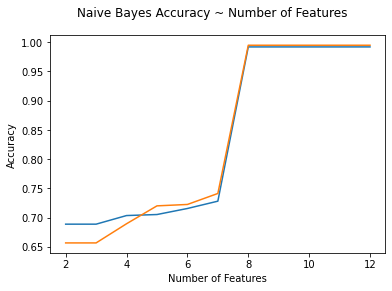

In [ ]:
plt.plot(features, nb_train_accuracy_list)
plt.plot(features, nb_test_accuracy_list)
plt.show
plt.suptitle('Naive Bayes Accuracy ~ Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

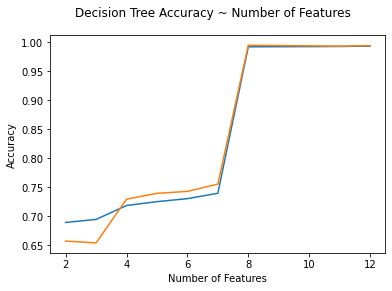

In [ ]:
plt.plot(features, dt_train_accuracy_list)
plt.plot(features, dt_test_accuracy_list)
plt.show
plt.suptitle('Decision Tree Accuracy ~ Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

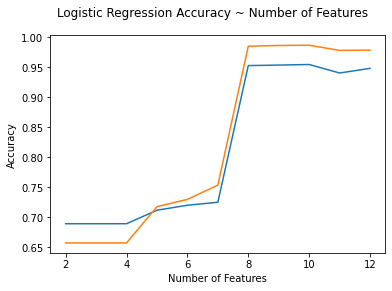

In [ ]:
plt.plot(features, lr_train_accuracy_list)
plt.plot(features, lr_test_accuracy_list)
plt.show
plt.suptitle('Logistic Regression Accuracy ~ Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')

## Decision Tree

In [ ]:
import time

max_depth = []
dt_train_perf = []
dt_pred_perf = []
dt_train_accuracy_f8 = []
dt_test_accuracy_f8 = []

x_train_vec, most_freq = tokenize(x_train, bag, d=8)
x_test_vec, most_freq = tokenize(x_test, bag, d=8)
x_test_vec_binary = x_test_vec>0
x_train_vec_binary = x_train_vec>0

for i in range(2, 20):
  print("------------------------")
  ts1 = time.perf_counter()
  dt_params = { 'max_depth': i }
  dt_model = decision_tree_train(x_train_vec_binary.T, y_train, dt_params)
  ts2 = time.perf_counter()

  dt_train_predictions = decision_tree_predict(x_train_vec_binary.T, dt_model)      
  ts3 = time.perf_counter()
               
  dt_train_accuracy = np.mean(dt_train_predictions == y_train)
  print("Decision tree training accuracy: %f" % dt_train_accuracy)

  dt_test_predictions = decision_tree_predict(x_test_vec_binary.T, dt_model)                     
  dt_test_accuracy = np.mean(dt_test_predictions == y_test)
  print("Decision tree testing accuracy: %f" % dt_test_accuracy)

  max_depth.append(i)
  dt_train_perf.append(ts2-ts1)
  dt_pred_perf.append(ts3-ts2)
  dt_train_accuracy_f8.append(dt_train_accuracy)
  dt_test_accuracy_f8.append(dt_test_accuracy)

------------------------
Decision tree training accuracy: 0.991929
Decision tree testing accuracy: 0.994800
------------------------
Decision tree training accuracy: 0.991929
Decision tree testing accuracy: 0.994800
------------------------
Decision tree training accuracy: 0.991929
Decision tree testing accuracy: 0.994800
------------------------
Decision tree training accuracy: 0.991929
Decision tree testing accuracy: 0.994800
------------------------
Decision tree training accuracy: 0.991980
Decision tree testing accuracy: 0.994600
------------------------
Decision tree training accuracy: 0.991980
Decision tree testing accuracy: 0.994800
------------------------
Decision tree training accuracy: 0.992105
Decision tree testing accuracy: 0.994800
------------------------
Decision tree training accuracy: 0.992105
Decision tree testing accuracy: 0.994800
------------------------
Decision tree training accuracy: 0.992105
Decision tree testing accuracy: 0.994800
------------------------
Dec

Text(0, 0.5, 'Accuracy')

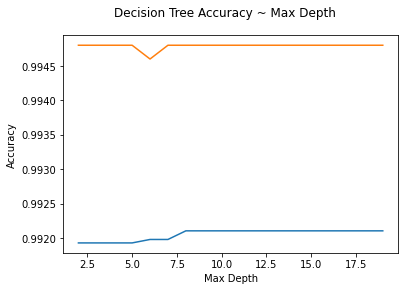

In [ ]:
plt.plot(max_depth, dt_train_accuracy_f8)
plt.plot(max_depth, dt_test_accuracy_f8)
plt.show
plt.suptitle('Decision Tree Accuracy ~ Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Performance in time')

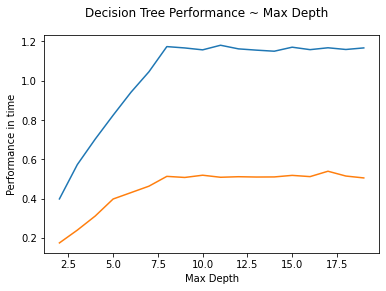

In [ ]:
plt.plot(max_depth, dt_train_perf)
plt.plot(max_depth, dt_pred_perf)
plt.show
plt.suptitle('Decision Tree Performance ~ Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Performance in time')

## Naive Bayes

In [ ]:
import time

nb_train_perf = []
nb_pred_perf = []
nb_train_accuracy_list = []
nb_test_accuracy_list = []

for i in range(2, 12):

  x_train_vec, most_freq = tokenize(x_train, bag, d=i)
  x_test_vec, most_freq = tokenize(x_test, bag, d=i)
  x_test_vec_binary = x_test_vec>0
  x_train_vec_binary = x_train_vec>0

  print("------------------------")
  nb_params = {}
  ts1 = time.perf_counter()
  nb_model = naive_bayes_train(x_train_vec_binary.T, y_train, nb_params)
  ts2 = time.perf_counter()

  nb_train_predictions = naive_bayes_predict(x_train_vec_binary.T, nb_model)
  ts3 = time.perf_counter()

  nb_test_predictions = naive_bayes_predict(x_test_vec_binary.T, nb_model)

  nb_train_accuracy = np.mean(nb_train_predictions == y_train)
  nb_test_accuracy = np.mean(nb_test_predictions == y_test)

  print("Naive Bayes training time: %f" % (ts2-ts1))
  print("Naive Bayes prediction time: %f" % (ts3-ts2))
  print("Naive Bayes training accuracy: %f" % nb_train_accuracy)
  print("Naive Bayes test accuracy: %f" % nb_test_accuracy)

  nb_train_accuracy_list.append(nb_train_accuracy)
  nb_test_accuracy_list.append(nb_test_accuracy)

  nb_train_perf.append(ts2-ts1)
  nb_pred_perf.append(ts3-ts2)


------------------------
Naive Bayes training time: 0.004312
Naive Bayes prediction time: 1.690323
Naive Bayes training accuracy: 0.688681
Naive Bayes test accuracy: 0.656600
------------------------
Naive Bayes training time: 0.004237
Naive Bayes prediction time: 1.671488
Naive Bayes training accuracy: 0.688681
Naive Bayes test accuracy: 0.656600
------------------------
Naive Bayes training time: 0.012495
Naive Bayes prediction time: 1.805886
Naive Bayes training accuracy: 0.703419
Naive Bayes test accuracy: 0.689400
------------------------
Naive Bayes training time: 0.008996
Naive Bayes prediction time: 1.717345
Naive Bayes training accuracy: 0.705173
Naive Bayes test accuracy: 0.720000
------------------------
Naive Bayes training time: 0.006304
Naive Bayes prediction time: 1.677057
Naive Bayes training accuracy: 0.715500
Naive Bayes test accuracy: 0.722400
------------------------
Naive Bayes training time: 0.008340
Naive Bayes prediction time: 1.717819
Naive Bayes training accur

Text(0, 0.5, 'Performance in time')

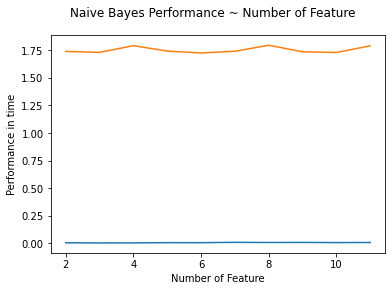

In [ ]:
features = []
for i in range(2, 12):
    features.append(i)


plt.plot(features, nb_train_accuracy)
plt.plot(features, nb_pred_perf)
plt.show
plt.suptitle('Naive Bayes Performance ~ Number of Feature')
plt.xlabel('Number of Feature')
plt.ylabel('Performance in time')

Text(0, 0.5, 'Accuracy')

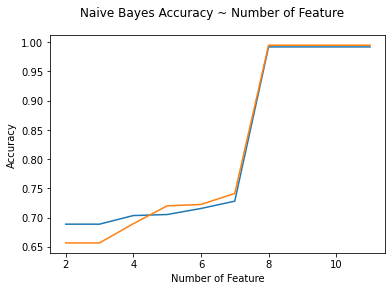

In [ ]:

plt.plot(features, nb_train_accuracy_list)
plt.plot(features, nb_test_accuracy_list)
plt.show
plt.suptitle('Naive Bayes Accuracy ~ Number of Feature')
plt.xlabel('Number of Feature')
plt.ylabel('Accuracy')

## Logistic Regression

In [ ]:

  regressor_weights, regressor_bias = logistic_regression_fit(x_train_vec_binary, y_train, learning_rate=0.001, n_iters=2000)
  regressor_train_predictions = logistic_regression_predict(x_train_vec_binary, regressor_weights, regressor_bias)
  regressor_test_predictions = logistic_regression_predict(x_test_vec_binary, regressor_weights, regressor_bias)

  lr_train_accuracy = np.mean(regressor_train_predictions == y_train)
  lr_test_accuracy = np.mean(regressor_test_predictions == y_test)
  print("Logistic Regression training accuracy: %f" % lr_train_accuracy)
  print("Logistic Regression testing accuracy: %f" % lr_test_accuracy)


In [ ]:
learning_rate = []
lr_train_perf = []
lr_pred_perf = []
lr_train_accuracy_f8 = []
lr_test_accuracy_f8 = []

x_train_vec, most_freq = tokenize(x_train, bag, d=8)
x_test_vec, most_freq = tokenize(x_test, bag, d=8)
x_test_vec_binary = x_test_vec>0
x_train_vec_binary = x_train_vec>0

init_rate = 0.0001
for i in range(2, 20):
  
  print("------------------------")
  ts1 = time.perf_counter()
  regressor_weights, regressor_bias = logistic_regression_fit(x_train_vec_binary, y_train, learning_rate=init_rate, n_iters=2000)
  ts2 = time.perf_counter()
  regressor_train_predictions = logistic_regression_predict(x_train_vec_binary, regressor_weights, regressor_bias)
  ts3 = time.perf_counter()

  regressor_test_predictions = logistic_regression_predict(x_test_vec_binary, regressor_weights, regressor_bias)
               
  
  lr_train_accuracy = np.mean(regressor_train_predictions == y_train)
  lr_test_accuracy = np.mean(regressor_test_predictions == y_test)
  print("Logistic Regression training accuracy: %f" % lr_train_accuracy)
  print("Logistic Regression testing accuracy: %f" % lr_test_accuracy)

  learning_rate.append(init_rate)
  lr_train_perf.append(ts2-ts1)
  lr_pred_perf.append(ts3-ts2)
  lr_train_accuracy_f8.append(lr_train_accuracy)
  lr_test_accuracy_f8.append(lr_test_accuracy)

  init_rate = init_rate*1.3

------------------------
Logistic Regression training accuracy: 0.813224
Logistic Regression testing accuracy: 0.856600
------------------------
Logistic Regression training accuracy: 0.830643
Logistic Regression testing accuracy: 0.872000
------------------------
Logistic Regression training accuracy: 0.853627
Logistic Regression testing accuracy: 0.900600
------------------------
Logistic Regression training accuracy: 0.857787
Logistic Regression testing accuracy: 0.903400
------------------------
Logistic Regression training accuracy: 0.865206
Logistic Regression testing accuracy: 0.919800
------------------------
Logistic Regression training accuracy: 0.889969
Logistic Regression testing accuracy: 0.935600
------------------------
Logistic Regression training accuracy: 0.905334
Logistic Regression testing accuracy: 0.946200
------------------------
Logistic Regression training accuracy: 0.918793
Logistic Regression testing accuracy: 0.955000
------------------------
Logistic Regres

Text(0, 0.5, 'Accuracy')

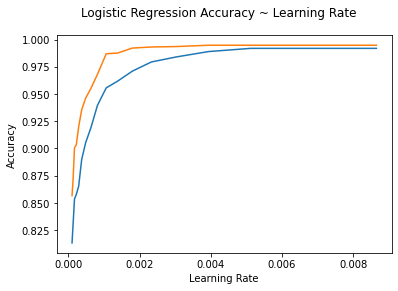

In [ ]:
plt.plot(learning_rate, lr_train_accuracy_f8)
plt.plot(learning_rate, lr_test_accuracy_f8)
plt.show
plt.suptitle('Logistic Regression Accuracy ~ Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Performance in time')

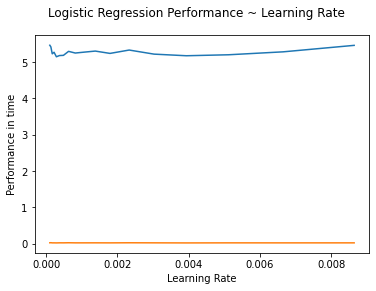

In [ ]:
plt.plot(learning_rate, lr_train_perf)
plt.plot(learning_rate, lr_pred_perf)
plt.show
plt.suptitle('Logistic Regression Performance ~ Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Performance in time')

------------------------
Logistic Regression training accuracy: 0.813224
Logistic Regression testing accuracy: 0.856600
------------------------
Logistic Regression training accuracy: 0.830643
Logistic Regression testing accuracy: 0.872000
------------------------
Logistic Regression training accuracy: 0.853627
Logistic Regression testing accuracy: 0.900600
------------------------
Logistic Regression training accuracy: 0.857787
Logistic Regression testing accuracy: 0.903400
------------------------
Logistic Regression training accuracy: 0.865206
Logistic Regression testing accuracy: 0.919800
------------------------
Logistic Regression training accuracy: 0.889969
Logistic Regression testing accuracy: 0.935600
------------------------
Logistic Regression training accuracy: 0.905334
Logistic Regression testing accuracy: 0.946200
------------------------
Logistic Regression training accuracy: 0.918793
Logistic Regression testing accuracy: 0.955000
------------------------
Logistic Regres